<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Classification?

* Binary Classification - E.g. True, False. 
* Muiticlass Calssification - E.g More than 2 categories.
* Multilabel classification - E.g. What tags does an Article have. 

We need to convert our images to tensors to use the Classification Modelling. 

## Inputs and Output shapes

The output is generated as the Probability of the possible outcomes of the Classification

Input=[batch size, width, height, color_channels]
or
Input=[32,224,224,3]

Output= The shape could be the no. of possibilities we have in a classification problem(oor classes)


## Typical architecture of a classification neural network 

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |


## Creating data to View and Fit

In [1]:
import tensorflow as tf

In [2]:

from sklearn.datasets import make_circles

#Make 1000 samples
n_samples=1000

#Create circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our Data is a little hard to understand. Let's Visualize it!

In [5]:
import pandas as pd

circles=pd.DataFrame({"X0":X[:,0],
                     "X1":X[:,1],
                     "label":y})

In [6]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


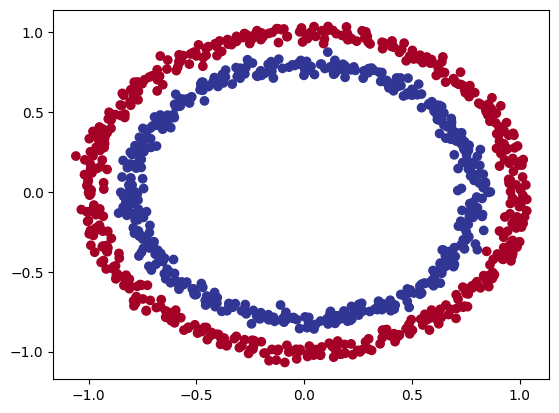

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

Steps in Modelling with tensorflow are :
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model.
5. Tweak.
6. Evaluate.....

In [11]:
#Set Random Seed
tf.random.set_seed(42)

#1. Create the model using the sequential API
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.8673 - accuracy: 0.4912
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


In [12]:
#Let's try improving our model for training a little longer
model_1.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 11/

In [13]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since we are working on a binary classification Problem and we are getting 50% accuracy, it's performing like it's guessing, so adding more layers to 

In [14]:
#Set the random seed
tf.random.set_seed(42)

# 1. Create a model , this time with 2 layers
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1222 - accuracy: 0.4530
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1991 - accuracy: 0.4530
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6621 - accuracy: 0.4660
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4844 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7176 - accuracy: 0.5050
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7094 - accuracy: 0.4970
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.4930
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.4960
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4920
Epoch 11/

In [15]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933465003967285, 0.5]

## Improving our Model

1. Create a model - We might want to add more layers or increase the number of hidden units within out layers
2. Compile a model - here we can choose a different optimization function such as adam apart from SGD
3. Fitting a model - we can fit our model for more epochs(leave it training for longer)


In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [17]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model (This time with 3 layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(X,y,epochs=100,verbose=False)

In [18]:
#4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5150


[0.6975843906402588, 0.5149999856948853]

Visualize our model's predictions, let's create a function 'plot_decision_boundary'

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the MeshGrid
*Plot the predictions as well as line between the zones(where each unique class falls)

In [19]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() -0.1, X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  
  #Create X Values(We're going to make prediction on these)
  x_in=np.c_[xx.ravel(),yy.ravel()] #Stack 2 D arrays together

  y_pred=model.predict(x_in)

  #Check for multiclass
  if len(y_pred[0])>1:
    print("we're doing multiclass classification")
    #We have to reshape our predictions to get them redy for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("We're doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
We're doing binary classification


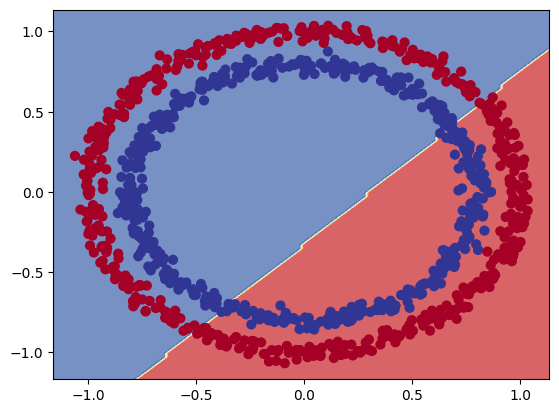

In [20]:
#Checkout the predictions our model is making
plot_decision_boundary(model_3,X,y)

## The missing piece : Non-linearity

In [21]:
#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#2. Comiple the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.0063 - accuracy: 0.4620
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3660 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7373 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7015 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5010
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4790
Epoch 11/

313/313 [==============================] - 1s 2ms/step
We're doing binary classification


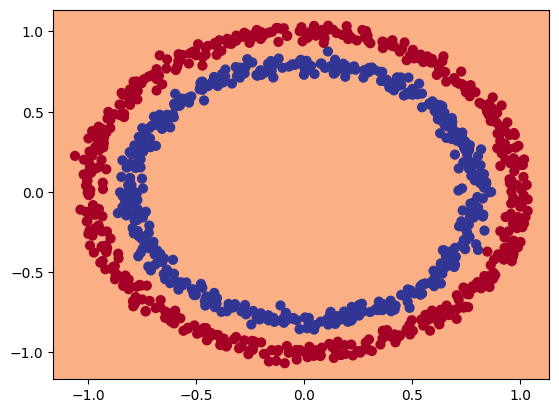

In [22]:
#Check the Decision 
plot_decision_boundary(model_4,X,y)

Let's try building our first Neural network with a non-linear activation functionmm

In [23]:
tf.random.set_seed(42)

#1. Create a model with a non-linear activation function
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8674 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8417 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8373 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8354 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8331 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8315 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8220 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7986 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7936 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7528 - accuracy: 0.4850
Epoch 11/

In [24]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.6821 - accuracy: 0.4650
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1871 - accuracy: 0.4590
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0609 - accuracy: 0.4600
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9824 - accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9341 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8977 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8697 - accuracy: 0.4570
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8457 - accuracy: 0.4550
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8256 - accuracy: 0.4550
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8086 - accuracy: 0.4520
Epoch 11/

In [25]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.7980


[0.5235390067100525, 0.7979999780654907]

313/313 [==============================] - 0s 1ms/step
We're doing binary classification


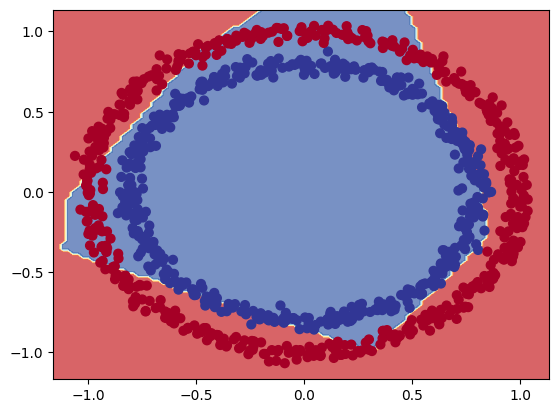

In [26]:
plot_decision_boundary(model_6,X,y)

In [27]:
#We will now solve the missing piece. Set the output activation function as softmax
tf.random.set_seed(42)

model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history=model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.5030
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5030
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5040
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5110
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5080
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5120
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5120
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5110
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5120
Epoch 11/

In [28]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.5890


[0.636905312538147, 0.5889999866485596]

313/313 [==============================] - 0s 1ms/step
We're doing binary classification


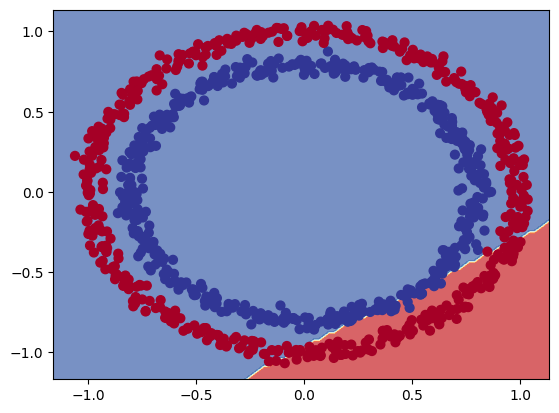

In [29]:
plot_decision_boundary(model_7,X,y)

Now We've discussed the concept of linear and non linear functions, let's see them in action. 

In [30]:
# Create a toy tensor(similar to the data we pass into our model)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

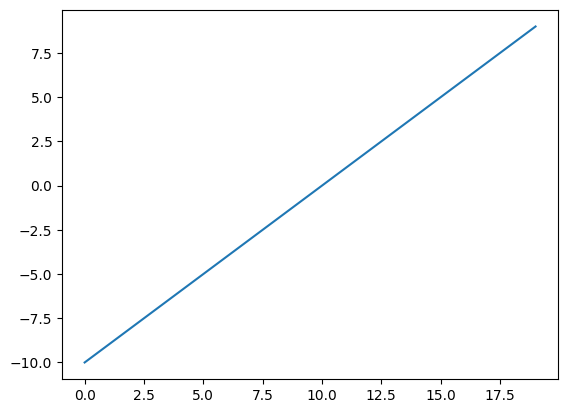

In [31]:
#Visualize the toy tensor
plt.plot(A);

In [32]:
#Let's start by replicating sigmoid - Sigmoid(X)= 1/ (1+exp(-x))
def sigmoid1(x):
  return 1/ (1+tf.exp(-x))

#use the sigmoid function on out tensor
sigmoid1(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

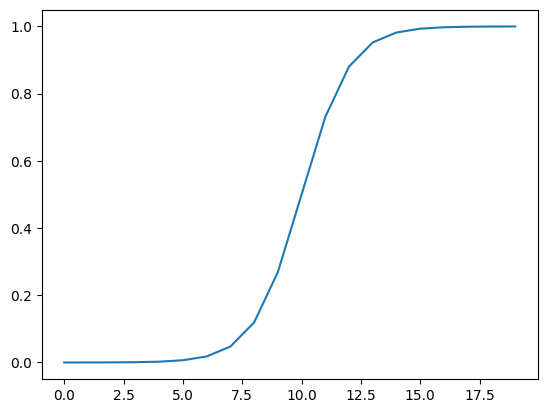

In [33]:
plt.plot(sigmoid1(A))

In [34]:
def relu1(x):
  return tf.maximum(x,0)

relu1(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

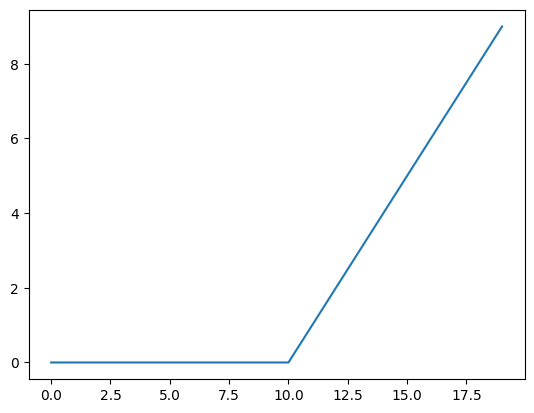

In [35]:
plt.plot(relu1(A))

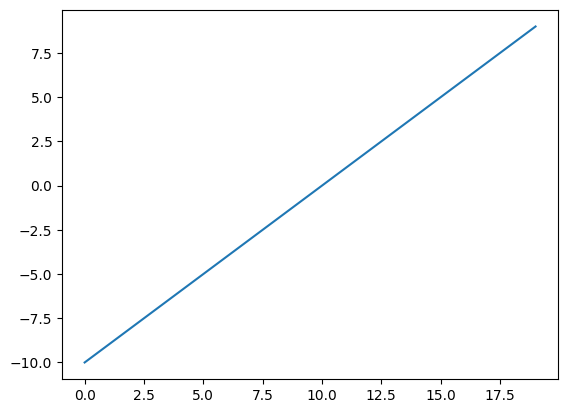

In [36]:
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classification Problem

So far we've been training and testing on the same dataset.

In [37]:
# Check how many examples we have
len(X)

1000

In [38]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [39]:
#Split into train and test sets
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

In [40]:
#Let's recreate a model to fit on training data and evaluate on testing data


In [41]:
#set random seed
tf.random.set_seed(42)

model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history=model_8.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 0.7321 - accuracy: 0.4762
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4437
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4175
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4300
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5000
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.4888
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5525
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5450
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6162
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.5562
Epoch 11/

In [42]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9850


[0.04163692146539688, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
We're doing binary classification


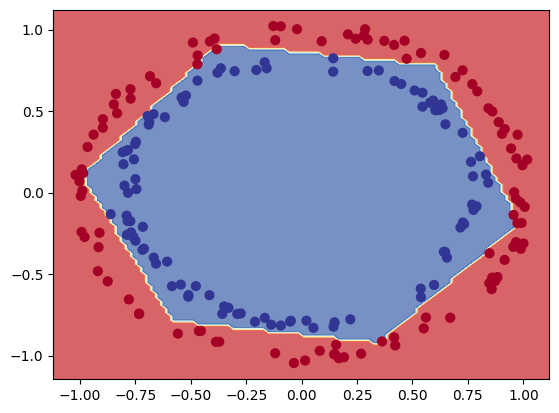

In [43]:
plot_decision_boundary(model_8,X_test,y_test)

## Plot the loss (or training) Curves

In [44]:
history.history

{'loss': [0.7320525646209717,
  0.7034498453140259,
  0.6989489793777466,
  0.695565402507782,
  0.6920685768127441,
  0.6901413798332214,
  0.6855770945549011,
  0.6813449859619141,
  0.6719825267791748,
  0.6612069010734558,
  0.6498416662216187,
  0.62298184633255,
  0.5910403728485107,
  0.5578632354736328,
  0.531741738319397,
  0.5023717284202576,
  0.48151808977127075,
  0.46489402651786804,
  0.450883150100708,
  0.45227718353271484,
  0.4283442795276642,
  0.41332921385765076,
  0.40198826789855957,
  0.3963833153247833,
  0.38451260328292847,
  0.3832054138183594,
  0.37671974301338196,
  0.36906108260154724,
  0.3609553575515747,
  0.3632149398326874,
  0.35415932536125183,
  0.34926849603652954,
  0.3442889451980591,
  0.33958983421325684,
  0.3326062858104706,
  0.3475586771965027,
  0.3313533067703247,
  0.3313679099082947,
  0.3227044939994812,
  0.3205043375492096,
  0.3162150979042053,
  0.3163034915924072,
  0.31580713391304016,
  0.3115423321723938,
  0.3076766729354

In [45]:
# Conver the history object to a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.732053,0.47625
1,0.703450,0.44375
2,0.698949,0.41750
3,0.695565,0.43000
4,0.692069,0.50000
...,...,...
245,0.061423,0.97750
246,0.057331,0.97625
247,0.054383,0.97750
248,0.069527,0.96750


Text(0.5, 1.0, 'Model_8 Loss Curves')

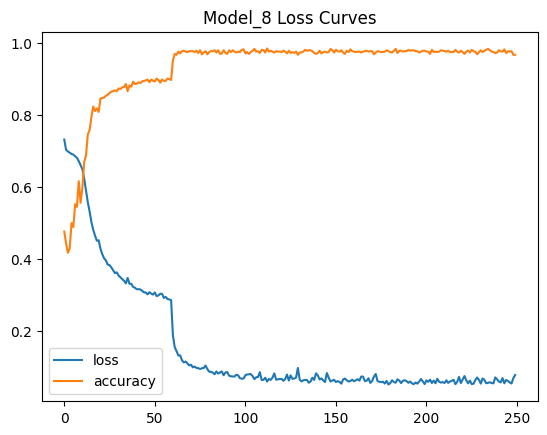

In [47]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title(
  "Model_8 Loss Curves"
)

Note : For many problems, if the loss function is going down, the predictions are improving.

## Finding the best learning Rate.

To find the best learning rate, i.e. the learning rate at which the loss decreases the most, we are going to use the following steps:

* A learning rate **Callback** - you can think of a callback as an extra piece of functionality, you can think to add *while it's training.
* Another model 
*A modifid loss curves Plot

In [49]:
#Set random seed
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history=model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 7ms/step - loss: 0.7000 - accuracy: 0.4762 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6994 - accuracy: 0.4775 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6987 - accuracy: 0.4762 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6980 - accuracy: 0.4775 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.4787 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.4787 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4787 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4787 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: >

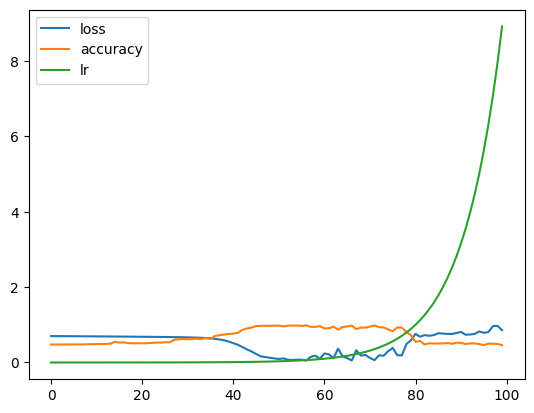

In [50]:
#Checkout the history
pd.DataFrame(history.history).plot()

In [52]:
#Plot the learning rate vs the loss

lrs=1e-4 *(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate Vs Loss')

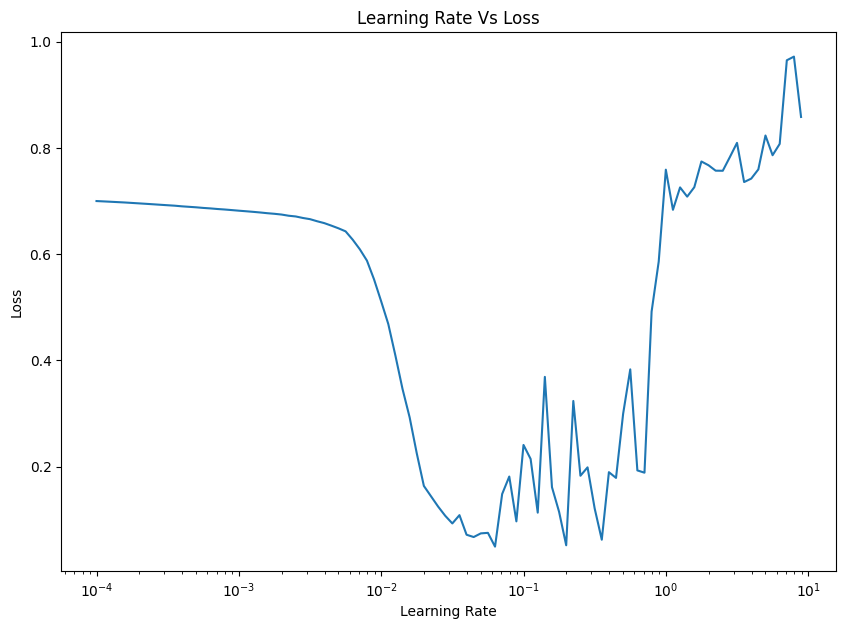

In [53]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

plt.title("Learning Rate Vs Loss")

In [54]:
# Example of other typical rearning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
#Trying out a learning rate based on the vizualization
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(0.02),
                 metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_10=model_10.fit(X_train,
                        y_train,
                        epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 3ms/step - loss: 0.6965 - accuracy: 0.4762
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5263
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.5962
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.5813
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.6425
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.6450
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5928 - accuracy: 0.7025
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5421 - accuracy: 0.7487
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5115 - accuracy: 0.7825
Epoch 10/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4681 - accuracy: 0.7937
Epoch 11/20
25/25 [

## Classification Evaluation Methods

* Accuracy
* Precision
* F1- Score
* Recall
* ROC Under AUC